#📌 Extracción

In [26]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [1]:
# Enlace al json, valide que fuera json al revisarlo en el git
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Leer el json y guardarlo en el dataframe
df = pd.read_json(url)

# Mostrar las primeras filas para validar la correcta carga
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [3]:
df.info()
df.isnull().sum()
#Revisamos si hay nulos y validamos los tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [4]:
# Paso los nombres de las columnas a minúsculas para que todo sea más fácil de usar
df.columns = df.columns.str.lower()

In [6]:
# Limpio los datos de la columna churn: paso todo a minúsculas y saco espacios
df['churn'] = df['churn'].str.strip().str.lower()

In [7]:
# Revisar tipos de datos por columna
for col in df.columns:
    print(col, type(df[col][0]))


customerid <class 'str'>
churn <class 'str'>
customer <class 'dict'>
phone <class 'dict'>
internet <class 'dict'>
account <class 'dict'>


In [8]:
# customerid y churn no son diccionarios asi que separo las que si lo son
columnas_dict = ['customer', 'phone', 'internet', 'account']

for col in columnas_dict:
    nuevas = df[col].apply(pd.Series)
    df = pd.concat([df, nuevas], axis=1)
    df.drop(columns=[col], inplace=True)


In [9]:
#Imprimo los primero registros para validar, quedando aún como diccionario charges asi que genero un nuevo separador
df.head()

,customerid,churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,no,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,no,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [12]:
# Separo los datos de la columna 'charges' en dos columnas nuevas
charges_expandido = df['Charges'].apply(pd.Series)
df = pd.concat([df, charges_expandido], axis=1)
df = df.drop(columns=['Charges'])


In [13]:
#Valido que se separaran, pero según el diccionario de git el nombre correcto de las columnas deberia ser Charges.Monthl y Charges.Total
df.columns

Index(['customerid', 'churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total'],
      dtype='object')

In [14]:
# Cambio al nombre correcto de esas columnas
df.rename(columns={'Monthly': 'Charges.Monthly', 'Total': 'Charges.Total'}, inplace=True)

In [15]:
#Valido nuevamente que ahora si los nombres sean correctos
df.columns

Index(['customerid', 'churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [16]:
df.head()

,customerid,churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,no,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,no,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [18]:
# Reviso nuevamente como estan los datos por tipo y transformo los que sean necesarios
for col in df.columns:
    print(col, type(df[col][0]))

customerid <class 'str'>
churn <class 'str'>
gender <class 'str'>
SeniorCitizen <class 'numpy.int64'>
Partner <class 'str'>
Dependents <class 'str'>
tenure <class 'numpy.int64'>
PhoneService <class 'str'>
MultipleLines <class 'str'>
InternetService <class 'str'>
OnlineSecurity <class 'str'>
OnlineBackup <class 'str'>
DeviceProtection <class 'str'>
TechSupport <class 'str'>
StreamingTV <class 'str'>
StreamingMovies <class 'str'>
Contract <class 'str'>
PaperlessBilling <class 'str'>
PaymentMethod <class 'str'>
Charges.Monthly <class 'numpy.float64'>
Charges.Total <class 'str'>


In [19]:
#Por ultimo cambio a float las columnas de charges.monthly y charges.total ya que tienen decimales
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')


In [20]:
# Ultima validacion que los tipos son correctos
for col in df.columns:
    print(col, type(df[col][0]))

customerid <class 'str'>
churn <class 'str'>
gender <class 'str'>
SeniorCitizen <class 'numpy.int64'>
Partner <class 'str'>
Dependents <class 'str'>
tenure <class 'numpy.int64'>
PhoneService <class 'str'>
MultipleLines <class 'str'>
InternetService <class 'str'>
OnlineSecurity <class 'str'>
OnlineBackup <class 'str'>
DeviceProtection <class 'str'>
TechSupport <class 'str'>
StreamingTV <class 'str'>
StreamingMovies <class 'str'>
Contract <class 'str'>
PaperlessBilling <class 'str'>
PaymentMethod <class 'str'>
Charges.Monthly <class 'numpy.float64'>
Charges.Total <class 'numpy.float64'>


In [22]:
#Revisamos si en el nuevo data transformado tenemos nuevos nulos
df.isnull().sum()

,0
customerid,0
churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [23]:
#Además revisamos que en churn (caolumna importante que nos indica que si se fue o no) tiene algun campo distinto a yes o no
df['churn'].unique()

array(['no', 'yes', ''], dtype=object)

In [24]:
#Reemplazamos los vacios por NaN
df.replace('', pd.NA, inplace=True)
#Eliminamos las filas nulas
df.dropna(inplace=True)


#📊 Carga y análisis

In [38]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


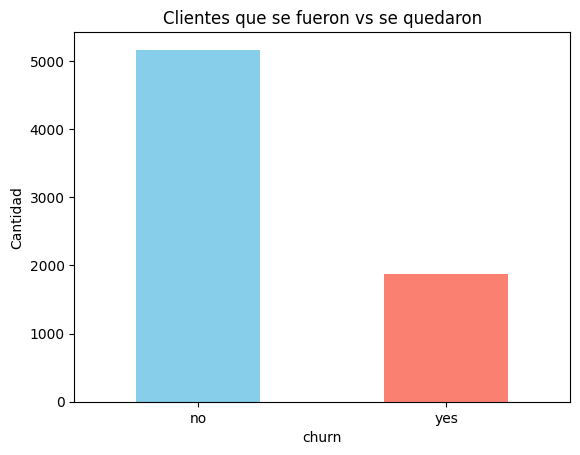

In [25]:
#Revisamos cuantos clientes aún se mantienen y cuantos se fueron
df['churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Clientes que se fueron vs se quedaron')
plt.xlabel('churn')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()


/tmp/ipython-input-1490373751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='Charges.Monthly', palette=['skyblue', 'salmon'])


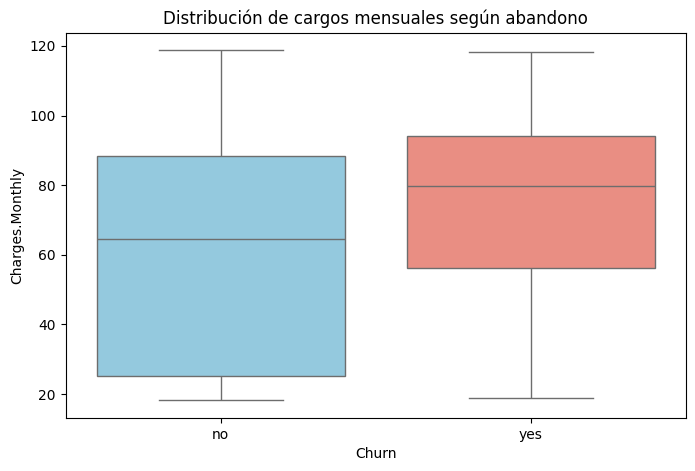

In [27]:
# Comparación de los cargos mensuales según si el cliente se fue o no
# Esto permite identificar si el precio influye en la decisión de abandonar el servicio
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='churn', y='Charges.Monthly', palette=['skyblue', 'salmon'])
plt.title('Distribución de cargos mensuales según abandono')
plt.xlabel('Churn')
plt.ylabel('Charges.Monthly')
plt.show()

/tmp/ipython-input-2735206768.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='Charges.Total', palette=['skyblue', 'salmon'])


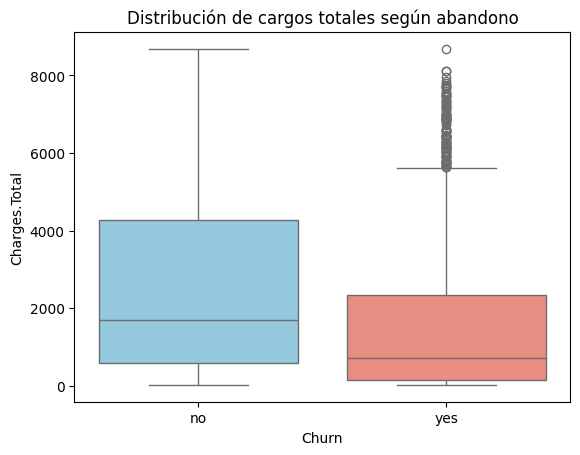

In [28]:
# Este gráfico permite observar cómo varían los cargos totales entre los clientes que se quedaron (no)
# y los que se fueron (yes), ayudando a identificar si existe alguna relación entre el gasto total y la tasa de abandono
sns.boxplot(data=df, x='churn', y='Charges.Total', palette=['skyblue', 'salmon'])
plt.title('Distribución de cargos totales según abandono')
plt.xlabel('Churn')
plt.ylabel('Charges.Total')
plt.show()

/tmp/ipython-input-223441424.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='tenure', palette=['skyblue', 'salmon'])


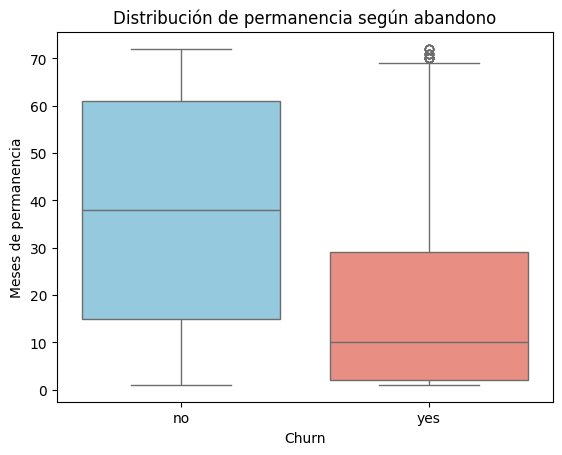

In [29]:
#Distribución de tiempo de permanencia según abandono
sns.boxplot(data=df, x='churn', y='tenure', palette=['skyblue', 'salmon'])
plt.title('Distribución de permanencia según abandono')
plt.xlabel('Churn')
plt.ylabel('Meses de permanencia')
plt.show()

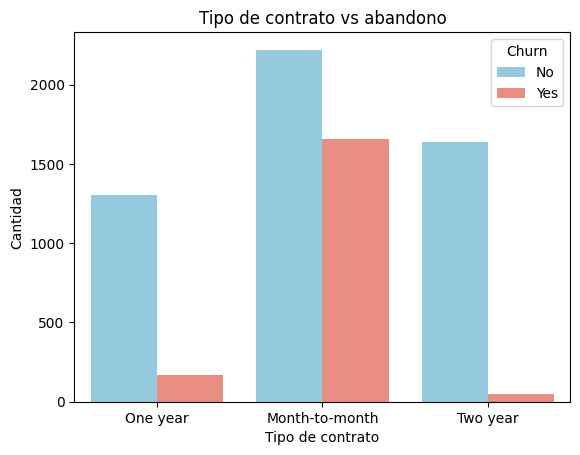

In [30]:
#Tipo de contrato vs abandono
sns.countplot(data=df, x='Contract', hue='churn', palette=['skyblue', 'salmon'])
plt.title('Tipo de contrato vs abandono')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

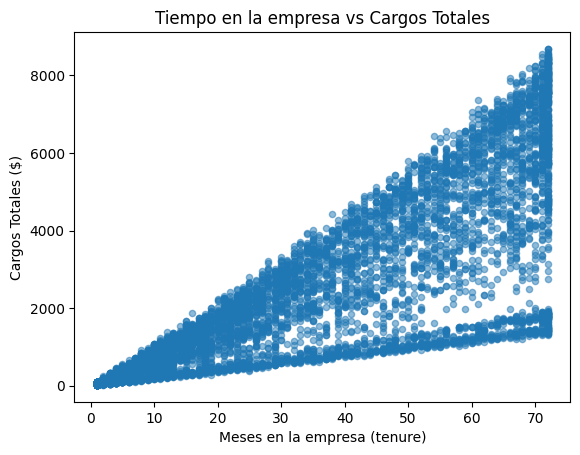

In [37]:
#Gráfico de disperción para ver el movimiento de si el cliente tiene mas tiempo en la empresa su gasto sube exponencialemente
df.plot.scatter(x='tenure', y='Charges.Total', alpha=0.5)
plt.title('Tiempo en la empresa vs Cargos Totales')
plt.xlabel('Meses en la empresa (tenure)')
plt.ylabel('Cargos Totales ($)')
plt.show()

#📄Informe final

#Informe Final - Análisis de Churn en Telecom X

##Objetivo del análisis
El objetivo fue identificar por qué algunos clientes están dejando la empresa Telecom X. Se trabajó con una base de datos en formato JSON y se aplicó limpieza, transformación y análisis simple para entender qué factores influyen en la decisión de abandonar el servicio.

Proceso de limpieza
- Se eliminaron filas con datos vacíos en columnas importantes como churn y Charges.Total
- Se separaron columnas que venían agrupadas en forma de diccionario (por ejemplo: phone, internet, account)
- Se estandarizó el texto a minúsculas
- Se corrigieron los tipos de datos para que los valores numéricos se lean correctamente

Análisis realizado
1. Churn general: Se vio que una parte importante de los clientes se fue del servicio
2. Contrato: Los clientes con contrato mensual son los que más se van
3. Charges.Monthly: Los que se van tienden a pagar un poco más cada mes
4. Charges.Total: Los que se quedan han pagado más en total, lo que indica que llevan más tiempo
5. Tenure: Los clientes nuevos se van más que los antiguos
6. Gráfico de dispersión: Mostró que a más tiempo con la empresa, más gasto total, como se espera

Resumen de estadísticas
- Promedio de cargo mensual: (64.79820819112628)
- Promedio de permanencia en meses: (32.421786120591584)
- Tipo de contrato más común: (Month-to-month)
- Método de pago más común: (Electronic check)

Conclusiones
- Los clientes nuevos y con contratos mensuales se van más
- El precio mensual puede ser un factor que influye
- Los contratos más largos ayudan a mantener a los clientes por más tiempo

Recomendaciones
- Ofrecer beneficios a clientes nuevos para que permanezcan
- Promover los contratos anuales
- Identificar a tiempo a los clientes que podrían irse y contactarlos con ofertas
